In [20]:
"""
barcode generator
"""

#need linux/macOS
import dionysus as d

#import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import timeit
from scripts import construct_alpha_complex

temp_data = np.load('temperature_data_small.npy')
heatmap = np.load('Heatmap.npy')
print(temp_data[0:2][0:2])
print(heatmap[0:2])

start_time = timeit.default_timer()
temp_data_alpha = construct_alpha_complex(temp_data)
elapsed = timeit.default_timer() - start_time
print(elapsed)

[[2.29983783e+00 3.07419482e+03]
 [2.95896840e+00 3.12618530e+03]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]
97.43703045300208


/Users/estebanleon1/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


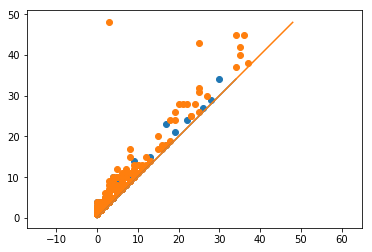

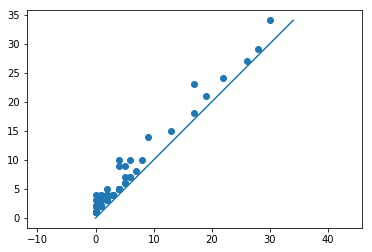

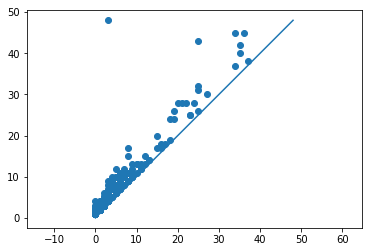

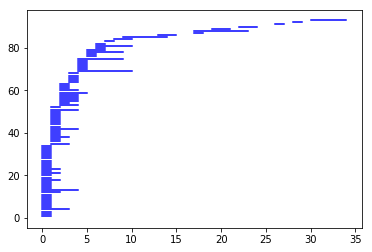

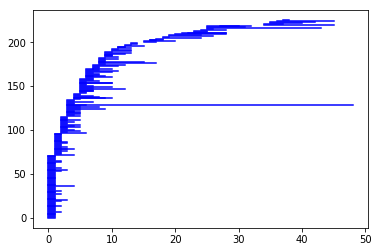

4.5733405710197985


In [26]:
"""
computing homology
"""
start_time = timeit.default_timer()

#VR filtration heatmap data
f_lower_star = d.fill_freudenthal(heatmap)
f_upper_star = d.fill_freudenthal(heatmap, reverse = True)
p = d.homology_persistence(f_lower_star)
dgms = d.init_diagrams(p, f_lower_star)

#scatters
d.plot.plot_diagram(dgms[0])
d.plot.plot_diagram(dgms[1])
plt.show()

#plots only H_0
d.plot.plot_diagram(dgms[0])
plt.show()
#plots only H_1
d.plot.plot_diagram(dgms[1])
plt.show()

#bars
d.plot.plot_bars(dgms[0])
plt.show()

d.plot.plot_bars(dgms[1])
plt.show()

elapsed = timeit.default_timer() - start_time
print(elapsed)

/Users/estebanleon1/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


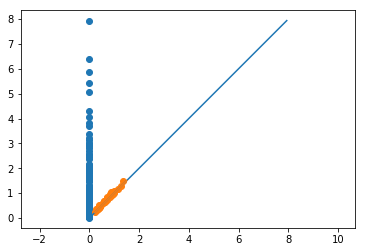

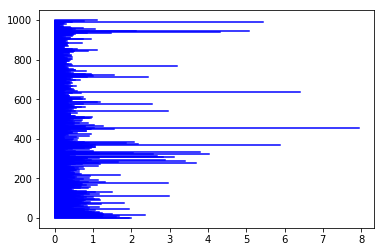

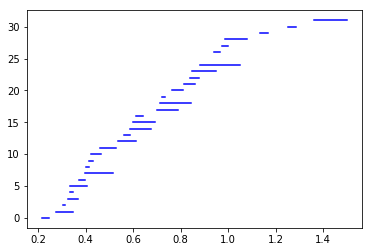

25.40700351994019


In [4]:
start_time = timeit.default_timer()

#VR filtration temperature data
test_f = d.fill_rips(temp_data, 2, 10.)
p = d.homology_persistence(test_f)
dgms = d.init_diagrams(p, test_f)

#scatters
d.plot.plot_diagram(dgms[0])
d.plot.plot_diagram(dgms[1])
plt.show()

#bars
d.plot.plot_bars(dgms[0])
plt.show()

d.plot.plot_bars(dgms[1])
plt.show()

elapsed = timeit.default_timer() - start_time
print(elapsed)

#interesting here the second graph has the same number of features as temperatures (1000)

/Users/estebanleon1/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


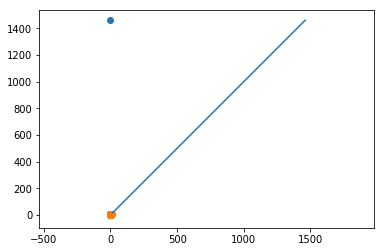

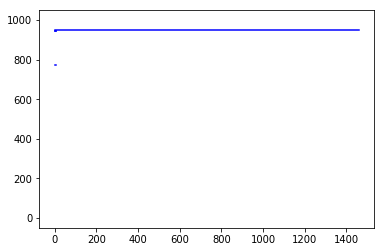

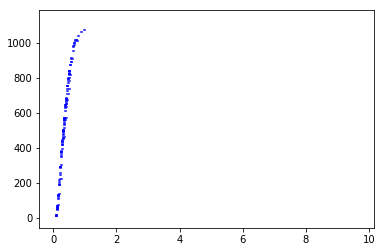

12.911212480976246


In [5]:
#alpha filtration temperature data

start_time = timeit.default_timer()

test_comp = temp_data_alpha[0]
test_bts = temp_data_alpha[1]
test_f = d.Filtration()
for j in range(len(test_comp)):
    test_f.append(d.Simplex(test_comp[j],test_bts[j]))
p = d.homology_persistence(test_f)
dgms = d.init_diagrams(p, test_f)

#scatters
d.plot.plot_diagram(dgms[0])
d.plot.plot_diagram(dgms[1])
plt.show()

#bars
d.plot.plot_bars(dgms[0])
plt.show()

d.plot.plot_bars(dgms[1])
plt.show()

elapsed = timeit.default_timer() - start_time
print(elapsed)